In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Dictionary

- **X1** - Relative Compactness

- **X2** - Surface Area

- **X3** - Wall Area

- **X4** - Roof Area

- **X5** - Overall Height

- **X6** - Orientation

- **X7** - Glazing Area

- **X8** - Glazing Area Distribution

- **Y1** - Heating Load

- **Y2** - Cooling Load

In [2]:
uci = pd.read_csv('/storage/emulated/0/Hamoye/StageB/uci.csv')


In [3]:
uci

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
uci.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [5]:
uci.rename({'X1':'Relative Compactness','X2':'Surface Area',
            'X3':'Wall Area', 'X4':'Roof Area', 'X5':'Overall Height',
            'X6':'Orientation', 'X7':'Glazing Area', 
            'X8':'Glazing Area Distribution', 'Y1':'Heating Load',
            'Y2':'Cooling Load'}, axis='columns', inplace=True)

In [6]:
uci

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


We want to answer the following questions:

- Which of the house properties affect most affect the `Cooling Load`?

- How effectively can we redict the cooling load of a house from just its properties?

We will start by understanding the Univariate case of Linear Regression also known as **Simple Linear Regression.**

The following equation is the general form of the **Simple Linear Regression** model:

\begin{equation}
\hat{y} = \theta_1x_1 + \theta_0
\label{eq. 1}
\end{equation}

**where:**

$\hat{y}$ = target column (*response variable*)

$\theta_1$ = slope of the line of best fit

$x_1$ = feature column (*independent variable*)

$\theta_0$ = intercept.

Additionally, $a_1$ and $a_0$ are known as the regression coefficients and they represent the parameter values specific to the dataset.

What we want to acieve is to find the optimal parameter values that best describe the relationship between the feature column and the target column .


### Feature Selection 

The next thing we are going to do now is to select the feature, $x_1$, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values $\theta_1$ and $\theta_0$ based on the training data.

Let's take a look at the description of the columns to determine which feature(s) are better suited for machine learning.


In [58]:
uci.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

We can see from above that the `Relative Compactness` and `Surface Area` both has diverse unique values which would be better suited for setting up a machine learning model. 

We are going to select a sample of the dataset and create a plot to explore the relationship between these two feature columns and the target column.


One of the assumptions of Linear Regression is that the relationship between the feature(s) column and the target column is linear, because of this we are going to pick a feature that has the strongest correlation with the target column.

In [76]:
uci_sample = uci[['Relative Compactness',
                  'Surface Area',
                 'Cooling Load']].sample(15, random_state=2)


### Visualizing the columns on a regression plot



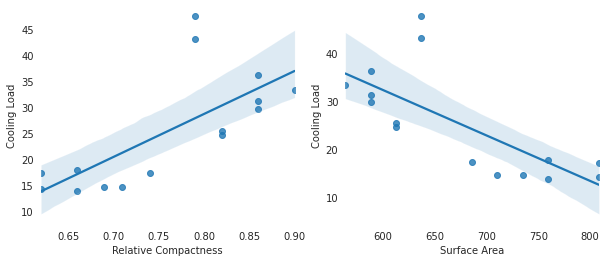

In [79]:
feature_columns = [
    'Relative Compactness', 'Surface Area'
]


fig = plt.figure(figsize=(10, 4))

for i in range(0, 2):
    ax = fig.add_subplot(1, 2, i+1)
    sns.set_style('white')
    sns.regplot(x=feature_columns[i], 
                y='Cooling Load', 
                data=uci_sample)
    sns.despine(bottom=True, left=True)

plt.show()

We can see that both of the feature columns, `Relative Compactness` and `Surface Area`, have a strong correlation with the `Cooling Load`.

However, `Relative Compactness` have a **strong, positive** correlation with the `Cooling Load` while `Surface Area` has a **strong, negative** correlation.

To know which of the columns correlates the most with the `Cooling Load`, we can use the `df.corr()` method to calculate the correlation coefficients between pairs.

In [80]:
uci_sample.corr()

,Relative Compactness,Surface Area,Cooling Load
Relative Compactness,1.000000,-0.995661,0.709631
Surface Area,-0.995661,1.000000,-0.721173
Cooling Load,0.709631,-0.721173,1.000000


The correlation between `Surface Area` and `Cooling Load` is around `-0.721` which is the highest.

We may think `Relative Compactness` has a higher correlation but this is not the case. **The closer the correlation coefficient is to ±1, the stronger it is.** The negative sign in `-0.721` is merely indicative of the direction of correlation which is basically saying *as one variable increases, the other decreases*. That is, they are inversely related.

We can now update our regression model in Equation \ref{eq. 1}:

\begin{equation}
\hat{y} = \theta_1 * Surface~Area + \theta_0
\label{eq. 2}
\end{equation}

We can now take a look at the model fitting criteria.

## Residual Sum of Squares

To find the optimal parameters for a linear regression model, we want to optimize the model's **residual sum of squares** (or **RSS**). 

Residuals is the difference between the predicted values for the target columns ($\hat{y}$) and the true values ($y$), and we want this difference to be as small as possible.

This involves summing the squares of errors:

\begin{equation}
RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + ... + (y_n - \hat{y}_n)^2
\label{eq. 3}
\end{equation}

which can be shorten to:

\begin{equation}
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\label{eq. 4}
\end{equation}

We can now use *scikit-learn*, which was designed to easily swap and try different models, to find the optimal parameter values for our model.

In [88]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(uci_sample[['Surface Area']], uci_sample['Cooling Load'])

a0 = lr.intercept_
a1 = lr.coef_

print ('Intercept: {}'.format(a0)) 
print ('Coefficient: {}'.format(a1))

Intercept: 88.84718600953894
Coefficient: [-0.09430729]


What we have just done is fit a univariate linear regression model between the `Surface Area` and `Cooling Load` columns. We then display the single coefficient and residual values.

If we refer back to Equation \ref{eq. 2}, the fitted model can be represented as:

\begin{equation}
\hat{y} = -0.0943 * Surface~Area + 88.8472
\label{eq. 5}
\end{equation}

Let's now use the `predict()` method to predict the labels using the *sample data* and compare them with the actual labels.

In [101]:
uci_sample_predictions = lr.predict(uci_sample[['Surface Area']])


In [104]:
uci_sample_predictions

array([31.08397059, 33.39449921, 35.70502782, 17.22079889, 28.77344197,
       12.59974165, 24.15238474, 33.39449921, 17.22079889, 19.5313275 ,
       21.84185612, 12.59974165, 28.77344197, 33.39449921, 31.08397059])

The output we have above is the prediction for the target column `Cooling Load`. We may compare these with the true values to see if we notice any discrepancies and how far apart are the residuals.

In [105]:
uci_sample

,Relative Compactness,Surface Area,Cooling Load
158,0.82,612.5,25.35
251,0.86,588.0,31.28
631,0.90,563.5,33.31
757,0.66,759.5,17.79
689,0.79,637.0,47.59
573,0.62,808.5,17.21
553,0.74,686.0,17.25
728,0.86,588.0,29.69
183,0.66,759.5,13.83
515,0.69,735.0,14.60


You may have noticed that we have some especially large residuals between the predicted values and the true values of `Cooling Load` column. 

Using *mean_squared_error*, we can calculate the MSE values for these predictions to quantify the fit.

In [112]:
from sklearn.metrics import mean_squared_error
uci_sample_mse = mean_squared_error(uci_sample_predictions, uci_sample['Cooling Load'])

print ('MSE: {}'.format(uci_sample_mse))

MSE: 56.9803119164897


It is important to mention that the MSE is basically the **mean** of the **Residual Sum of Square** described in Equation \ref{eq. 3} and \ref{eq. 4} above, or as represented by the equation for it:

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
\label{eq. 6}
\end{equation}

where $n$ is the count of the values

From our MSE, we can calculate the *root mean squared error*, **RMSE**, by finding the square root of **MSE**.

The RMSE is the average distance of a data point from the fitted line measure along a vertical line.

In [117]:
uci_sample_rmse = np.sqrt(uci_sample_mse)

print ('RMSE: {}'.format(uci_sample_rmse))

RMSE: 7.548530447477158


### Going Further

We can't make inferences from our model yet. We have to ensure that all assumptions for linear regression has been met.

Let's check for the assumptions one after the other.

## Notes

- Check for outliers because linear regression is sensitive to outlier effects

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(uci_sample[['Relative Compactness']], uci_sample['Cooling Load'])
a0 = lr.intercept_
a1 = lr.coef_
print ('Intercept: {}'.format(a0)) 
print ('Coefficient: {}'.format(a1))

Intercept: -37.75947346072187
Coefficient: [83.0843949]


In [107]:
uci_sample_predictions = lr.predict(uci_sample[['Relative Compactness']])


In [108]:
uci_sample_predictions

array([30.36973036, 33.69310616, 37.01648195, 17.07622718, 27.87719851,
       13.75285138, 23.72297877, 33.69310616, 17.07622718, 19.56875902,
       21.23044692, 13.75285138, 27.87719851, 33.69310616, 30.36973036])

In [109]:
uci_sample

,Relative Compactness,Surface Area,Cooling Load
158,0.82,612.5,25.35
251,0.86,588.0,31.28
631,0.90,563.5,33.31
757,0.66,759.5,17.79
689,0.79,637.0,47.59
573,0.62,808.5,17.21
553,0.74,686.0,17.25
728,0.86,588.0,29.69
183,0.66,759.5,13.83
515,0.69,735.0,14.60


In [9]:
from yellowbrick.regressor import residuals_plot